In [41]:
%matplotlib inline

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

## Read the file

In [43]:
df = pd.read_csv('Churn_Modelling.csv')
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### See the data

In [44]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Check if there are any missing values

In [45]:
df.isnull().sum(axis=0)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Check the box plots

<AxesSubplot:>

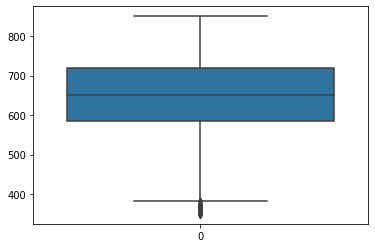

In [46]:
sns.boxplot(data=df.loc[:, 'CreditScore'])

<AxesSubplot:>

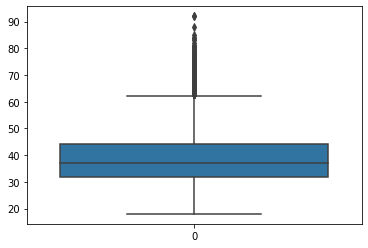

In [47]:
sns.boxplot(data=df.loc[:,'Age'])

<AxesSubplot:>

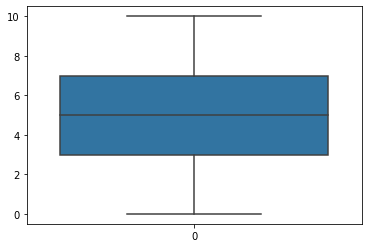

In [48]:
sns.boxplot(data=df.loc[:, 'Tenure'])

<AxesSubplot:>

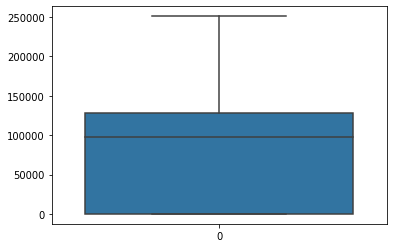

In [49]:
sns.boxplot(data=df.loc[:,'Balance'])

NumOfProducts can be considered for outlier removal

<AxesSubplot:>

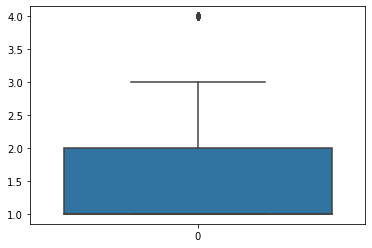

In [50]:
sns.boxplot(data=df.loc[:,'NumOfProducts'])

<AxesSubplot:>

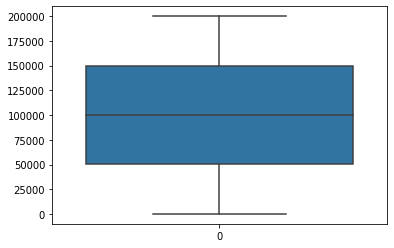

In [51]:
sns.boxplot(data=df.loc[:,'EstimatedSalary'])

In [52]:
#sns.pairplot(df)
#plt.show()

### One hot encoding, scaling etc.

In [53]:
ohdf = df.drop(columns=['RowNumber', 'Surname', 'CustomerId'])
ohdf.describe()
X, y = ohdf[ohdf.columns[:-1]], ohdf[df.columns[-1]]
X = pd.get_dummies(X, columns=['Gender', 'Geography'], dummy_na=False)
print(y.name, "|||",  X.columns)
scaler = StandardScaler().fit(X)
print(X.shape)
scaled_X = scaler.transform(X)
print(scaled_X.shape)

Exited ||| Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Gender_Female', 'Gender_Male',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')
(10000, 13)
(10000, 13)


<class 'numpy.ndarray'> 13
0 CreditScore
1 Age
2 Tenure
3 Balance
4 NumOfProducts
5 HasCrCard
6 IsActiveMember
7 EstimatedSalary
8 Gender_Female
9 Gender_Male
10 Geography_France
11 Geography_Germany
12 Geography_Spain


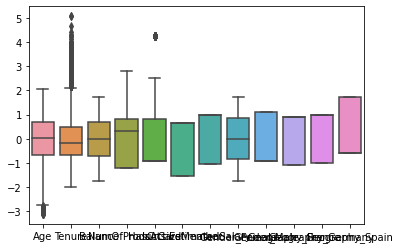

In [54]:
#sns.boxplot(data=scaled_X)
print(type(scaled_X), scaled_X.shape[1])
for i in range(scaled_X.shape[1]):
    print(i, X.columns[i])
scaled_X = pd.DataFrame({X.columns[i+1]: scaled_X[:,i].T for i in range(scaled_X.shape[1]-1)})
scaled_X
sns.boxplot(data=scaled_X)
plt.show()

In [55]:
scaled_X.describe()
scaled_X.shape
#sns.boxplot(data=scaled_X)

(10000, 12)

### Clamp NumOfProducts to 1.5 IQR

0        True
1        True
2       False
3        True
4        True
        ...  
9995     True
9996     True
9997     True
9998     True
9999    False
Name: NumOfProducts, Length: 10000, dtype: bool
calling clamp now
0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Name: NumOfProducts, Length: 10000, dtype: bool


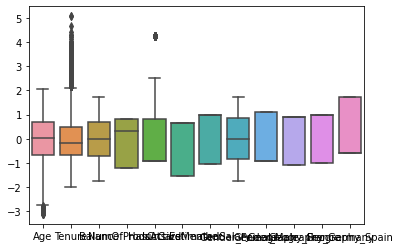

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Name: NumOfProducts, Length: 10000, dtype: bool
0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Name: NumOfProducts, Length: 10000, dtype: bool


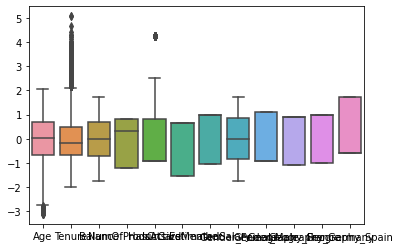

In [56]:
def clamp_data(df: pd.DataFrame, column)->pd.DataFrame:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = abs(q3 - q1)
    #mask = ~df[column].between(q1, q3, inclusive=True)
    mean = df[column].mean()
    mask = df[column].between(q1, 13, inclusive=True)
    print(mask)
    df[column].clip(q1, q3, inplace=True)
    mask = df[column].between(q1, q3, inclusive=True)
    sns.boxplot(data=df)
    plt.show()
    print(mask)
    return df

#sns.boxplot(data=scaled_X)
plt.show()
q1 = scaled_X['NumOfProducts'].quantile(0.25)
q3 = scaled_X['NumOfProducts'].quantile(0.75)
mean = scaled_X['NumOfProducts'].mean()
maks = scaled_X['NumOfProducts'].between(q1, q3, inclusive=True)
print(maks)
print("calling clamp now")
iqr = abs(q3 - q1)
scaled_X = clamp_data(scaled_X, 'NumOfProducts')
maks = scaled_X['NumOfProducts'].between(q1, q3, inclusive=True)
print(maks)
plt.clf()
sns.boxplot(data=scaled_X)
plt.show()


(10000, 12)

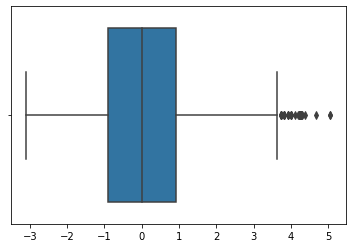

In [57]:
sns.boxplot(scaled_X.T)
scaled_X.shape